In [1]:
%cd ..

/Users/lukakarginov/Documents/Dar Lab/scnnoise


In [2]:
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr
import seaborn as sns
from matplotlib.lines import Line2D

In [3]:
from scnnoise import _scnnoise
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import pandas as pd
import src.scnnoise.CellType as ct
import src.scnnoise.LTSim as lt

<h1>Testing LTSim</h1>

# Exp 1: Constitutive Expression

In [41]:
cell_type_csv = 'data/toy_data/two_gene_cell_types_constitutive.csv'
c4 = ct.CellType(4,cell_type_csv,[]) #placeholder reaction rates
c3 = ct.CellType(3,cell_type_csv,[c4]) 
c2 = ct.CellType(2,cell_type_csv,[]) 
c1 = ct.CellType(1,cell_type_csv,[c2,c3]) 
 
c1.children[1].children[0].lineageName #should output 4
c4.rxn_rates

{'A': {'transcription': 30.0,
  'mRNA decay': 0.1299,
  'translation': 0.3299,
  'protein decay': 0.00245},
 'B': {'transcription': 30.0,
  'mRNA decay': 0.1299,
  'translation': 0.3299,
  'protein decay': 0.00245}}

In [42]:
sim1  = lt.LTSim(c1, 2, gene_csv='data/toy_data/two_gene_constitutive.csv', mol_csv ='data/toy_data/two_gene_constitutive_molecule_count.csv',count_csv = 'count.csv',sample_csv = 'samplesExp1.csv', molecule = "mRNA")

1T
[{'mRNA decay': 0.1299, 'protein decay': 0.00245, 'transcription': 2.11, 'translation': 0.3299}, {'mRNA decay': 0.1299, 'protein decay': 0.00245, 'transcription': 2.11, 'translation': 0.3299}]
[{'mRNA decay': 0.1299, 'protein decay': 0.00245, 'transcription': 0.1, 'translation': 0.3299}, {'mRNA decay': 0.1299, 'protein decay': 0.00245, 'transcription': 0.1, 'translation': 0.3299}]


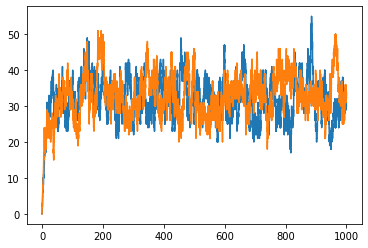

           time  A:gene  A:mRNA  A:protein  B:gene  B:mRNA  B:protein
0      0.000000       2       0          0       2       0          0
1      0.000000       2       0          0       2       0          0
2      0.138026       2       0          0       2       1          0
3      0.149409       2       0          0       2       2          0
4      0.045798       2       0          0       2       3          0
...         ...     ...     ...        ...     ...     ...        ...
51573  0.002836       2      30       3974       2      34       4110
51574  0.022887       2      30       3974       2      34       4109
51575  0.001649       2      30       3974       2      34       4108
51576  0.019333       2      30       3974       2      33       4108
51577  0.000935       2      30       3974       2      32       4108

[51578 rows x 7 columns]
1
2T
[{'mRNA decay': 0.1299, 'protein decay': 0.00245, 'transcription': 0.1, 'translation': 0.3299}, {'mRNA decay': 0.1299, 'protein d

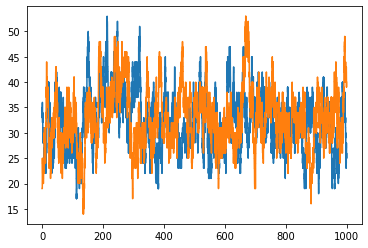

           time  A:gene  A:mRNA  A:protein  B:gene  B:mRNA  B:protein
0      0.000000       2      34       4401       2      19       4081
1      0.000000       2      34       4401       2      19       4081
2      0.006449       2      33       4401       2      19       4081
3      0.041042       2      33       4400       2      19       4081
4      0.004135       2      33       4401       2      19       4081
...         ...     ...     ...        ...     ...     ...        ...
59882  0.001309       2      25       4255       2      40       4388
59883  0.002210       2      25       4255       2      40       4387
59884  0.017780       2      25       4254       2      40       4387
59885  0.008424       2      25       4254       2      40       4386
59886  0.010591       2      25       4253       2      40       4386

[59887 rows x 7 columns]
2
3T
[{'mRNA decay': 0.1299, 'protein decay': 0.00245, 'transcription': 10.0, 'translation': 0.3299}, {'mRNA decay': 0.1299, 'protein 

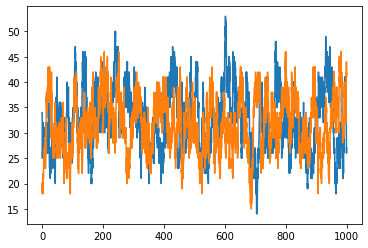

           time  A:gene  A:mRNA  A:protein  B:gene  B:mRNA  B:protein
0      0.000000       2      34       4401       2      19       4081
1      0.000000       2      34       4401       2      19       4081
2      0.007673       2      34       4401       2      20       4081
3      0.046421       2      34       4402       2      20       4081
4      0.010406       2      34       4401       2      20       4081
...         ...     ...     ...        ...     ...     ...        ...
58581  0.002733       2      26       4300       2      41       4252
58582  0.005209       2      26       4300       2      41       4253
58583  0.005263       2      27       4300       2      41       4253
58584  0.007210       2      27       4300       2      42       4253
58585  0.006618       2      27       4300       2      42       4254

[58586 rows x 7 columns]
3
4T
[{'mRNA decay': 0.1299, 'protein decay': 0.00245, 'transcription': 20.0, 'translation': 0.3299}, {'mRNA decay': 0.1299, 'protein 

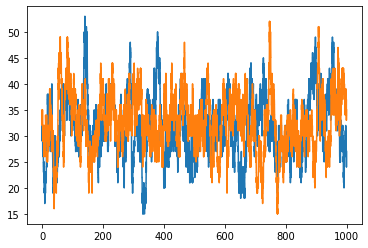

           time  A:gene  A:mRNA  A:protein  B:gene  B:mRNA  B:protein
0      0.000000       2      30       4184       2      35       4407
1      0.000000       2      30       4184       2      35       4407
2      0.000332       2      30       4185       2      35       4407
3      0.000713       2      30       4185       2      35       4408
4      0.009385       2      30       4184       2      35       4408
...         ...     ...     ...        ...     ...     ...        ...
58811  0.039287       2      27       4335       2      35       4263
58812  0.002777       2      27       4335       2      35       4264
58813  0.011253       2      27       4335       2      35       4263
58814  0.009748       2      27       4335       2      35       4262
58815  0.010544       2      27       4335       2      35       4261

[58816 rows x 7 columns]
4


In [43]:
data = sim1.sim_LT(100)

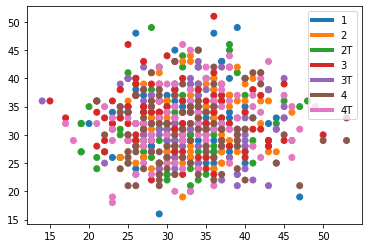

In [44]:
#scatter of 2 genes
plt.scatter(
     data[data.columns[0]],
     data[data.columns[1]],
    c=[sns.color_palette()[x] for x in data[data.columns[-1]].map({"1":0, "2":1, "2T":2,"3":3 ,"3T":4, "4":5, "4T":6 })])
custom_lines = [Line2D([0], [0], color=sns.color_palette()[x], lw=4) for x in range(7)]
                
sortedct = list(set(data[data.columns[-1]]))
sortedct.sort()
plt.legend(custom_lines, sortedct)

In [9]:
for i in range(4):
    print(np.mean(data[data[data.columns[2]] == str(i+1)][data.columns[0]]))

31.96
32.43
31.84
33.52


# 2 State Model

<h2>2 Genes Protein</h2>

In [4]:
### Testing cellType creation
cell_type_csv = 'data/toy_data/two_gene_cell_types.csv'
c4 = ct.CellType(4,cell_type_csv,[]) #placeholder reaction rates
c3 = ct.CellType(3,cell_type_csv,[c4]) 
c2 = ct.CellType(2,cell_type_csv,[]) 
c1 = ct.CellType(1,cell_type_csv,[c2,c3]) 
 
c1.children[1].children[0].lineageName #should output 4
c4.rxn_rates


{'A': {'gene on': 0.2256,
  'gene off': 0.0,
  'transcription': 5.0,
  'mRNA decay': 0.1299,
  'translation': 0.3299,
  'protein decay': 0.00245},
 'B': {'gene on': 0.2256,
  'gene off': 0.0,
  'transcription': 5.0,
  'mRNA decay': 0.1299,
  'translation': 0.3299,
  'protein decay': 0.00245}}

In [5]:
sim1  = lt.LTSim(c1, 2, gene_csv='data/toy_data/two_gene_cell_cycle.csv', mol_csv ='data/toy_data/two_gene_cell_cycle_molecule_count.csv',count_csv = 'count.csv',sample_csv = 'samples2GeneProt.csv', molecule = "mRNA")

In [6]:
data = sim1.sim_LT(100)

1T
[{'gene off': 0.0, 'gene on': 0.0282, 'mRNA decay': 0.1299, 'protein decay': 0.00245, 'transcription': 2.11, 'translation': 0.3299}, {'gene off': 0.0, 'gene on': 0.0282, 'mRNA decay': 0.1299, 'protein decay': 0.00245, 'transcription': 2.11, 'translation': 0.3299}]
[{'gene off': 1.218, 'gene on': 0.0, 'mRNA decay': 0.0, 'protein decay': 0.0, 'transcription': 4.22, 'translation': 0.0}, {'gene off': 1.218, 'gene on': 0.0, 'mRNA decay': 0.0, 'protein decay': 0.0, 'transcription': 4.22, 'translation': 0.0}]
1
2T
[{'gene off': 0.0, 'gene on': 0.0564, 'mRNA decay': 0.1299, 'protein decay': 0.00245, 'transcription': 3.0, 'translation': 0.3299}, {'gene off': 0.0, 'gene on': 0.0564, 'mRNA decay': 0.1299, 'protein decay': 0.00245, 'transcription': 3.0, 'translation': 0.3299}]
[{'gene off': 0.0, 'gene on': 0.0, 'mRNA decay': 4.5465, 'protein decay': 11.296949999999999, 'transcription': 4.22, 'translation': 11.546500000000002}, {'gene off': 0.0, 'gene on': 0.0, 'mRNA decay': 5.8454999999999995, 

In [24]:
data = pd.read_csv('samples2GeneProt.csv', index_col = 0, header = None)


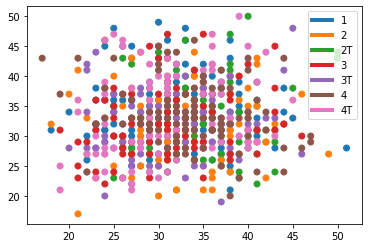

In [8]:
#scatter of 2 genes
plt.scatter(
     data[data.columns[0]],
     data[data.columns[1]],
    c=[sns.color_palette()[x] for x in data[data.columns[-1]].map({"1":0, "2":1, "2T":2,"3":3 ,"3T":4, "4":5, "4T":6 })])
custom_lines = [Line2D([0], [0], color=sns.color_palette()[x], lw=4) for x in range(7)]
                
sortedct = list(set(data[data.columns[-1]]))
sortedct.sort()
plt.legend(custom_lines, sortedct)

In [24]:
for i in range(4):
    plt.plot(a[i],np.divide(a[i],b[i])**2,'o')

plt.xlabel('Mean')
plt.ylabel('CV-Squared')
plt.legend(['Cell Type 1', 'Cell Type 2', 'Cell Type 3', 'Cell Type 4'])

NameError: name 'a' is not defined

<h2>100 Gene System Data Generation</h2>

### Constitutive Expression

In [ ]:
### Creating 100 Gene spec files for simulator

genes = [['Gene '+str(i),'constitutive', 'gene', 2, 'mRNA', 0, 'protein', 0] for i in range(100)]
reactions = [[gene[0],'constitutive',0,0, 'transcription',7.11,'mRNA decay',0.1299,'translation',0.3299,'protein decay',0.00245] for gene in genes]
pd.DataFrame(reactions).to_csv('data/toy_data/100GenesConstitutiveRxnsv1.csv', header = False, index = False)
pd.DataFrame(genes).to_csv('data/toy_data/100GenesConstitutivev1.csv', header = False, index = False)



<h3>2 State Model</h3>

In [4]:
### Creating 100 Gene spec files for simulator

genes = [['Gene '+str(i),'two-state', 'gene on', 2, 'gene off', 0, 'mRNA', 0, 'protein', 0] for i in range(100)]
reactions = [[gene[0],'two-state',0,0,'gene on',0.0282,'gene off',0.609,'transcription',7.11,'mRNA decay',0.1299,'translation',0.3299,'protein decay',0.00245] for gene in genes]
pd.DataFrame(reactions).to_csv('data/toy_data/100GenesSimpleRxns.csv', header = False, index = False)
pd.DataFrame(genes).to_csv('data/toy_data/100GenesSimple.csv', header = False, index = False)



### cellType creation 1
    Changing 30% of genes between simulations
    Base State:
        M5
    Other States
        Transcription .5-1.5x 

In [5]:
cell_type_csv = 'data/toy_data/100GenesSimpleCellTypes.csv'
celltypes = [['Gene','gene on','gene off','transcription','mRNA decay','translation','protein decay','Cell Type']]
for celltype in range(1,5):
    samp = [7.11*(np.random.random()+.5) if r else 7.11 for r in np.random.random(100)<.3]
    for idx, gene in enumerate(genes):
        celltypes.append([gene[0], 0.0282,0.609,samp[idx],0.1299,0.3299,0.00245,celltype])
pd.DataFrame(celltypes).to_csv(cell_type_csv, header = False, index = False)

4

### cellType creation 2
    Changing 50% of genes between simulations
    Base State:
        M5
    Other States
        2: Transcription 1-2x 
        3: Transcription 2-3x 
        4: Transcription 3-4x 

In [5]:
### Testing cellType creation
#this time we try changing 50% of all genes in each cell type mutliplying by:
    #1-2 for celltype 2
    #2-3 for celltype 3
    #3-4 for celltype 4
    
    #samples2.csv

cell_type_csv = 'data/toy_data/100GenesSimpleCellTypestest2.csv'
celltypes = [['Gene','gene on','gene off','transcription','mRNA decay','translation','protein decay','Cell Type']]
for celltype in range(1,5):
    samp = [7.11*(np.random.random()+(celltype-1)) if (r and celltype!=1) else 7.11 for r in np.random.random(100)<.5]
    for idx, gene in enumerate(genes):
        celltypes.append([gene[0], 0.0282,0.609,samp[idx],0.1299,0.3299,0.00245,celltype])
pd.DataFrame(celltypes).to_csv(cell_type_csv, header = False, index = False)


4

### CellType creation 3
    Changing 100% of genes between CellTypes
    Base State:
        M5
    Other States
        2: Transcription 2-4x 
        3: Transcription 4-6x 
        4: Transcription 6-8x 

In [4]:
### Testing cellType creation w. mRNA
#this time we try changing 100% of all genes in each cell type mutliplying by:
    #2-4 for celltype 2
    #4-6 for celltype 3
    #6-8 for celltype 4
    
    #samples2.csv

cell_type_csv = 'data/toy_data/100GenesSimpleCellTypestest3.csv'
celltypes = [['Gene','gene on','gene off','transcription','mRNA decay','translation','protein decay','Cell Type']]
for celltype in range(1,5):
    samp = [7.11*2*(np.random.random()+(celltype-1)) if (r and celltype!=1) else 7.11 for r in np.random.random(100)<1]
    for idx, gene in enumerate(genes):
        celltypes.append([gene[0], 0.0282,0.609,samp[idx],0.1299,0.3299,0.00245,celltype])
pd.DataFrame(celltypes).to_csv(cell_type_csv, header = False, index = False)


4

# 100 Genes Protein Simulation

In [5]:
cell_type_csv = 'data/toy_data/100GenesSimpleCellTypestest3.csv' #add cell type csv here
c4 = ct.CellType(4,cell_type_csv,[]) #placeholder reaction rates
c3 = ct.CellType(3,cell_type_csv,[c4]) 
c2 = ct.CellType(2,cell_type_csv,[]) 
c1 = ct.CellType(1,cell_type_csv,[c2,c3]) 

sim1  = lt.LTSim(c1, 100, gene_csv='data/toy_data/100GenesSimpleRxns.csv', mol_csv ='data/toy_data/100GenesSimple.csv',count_csv = 'count.csv',sample_csv = 'samplesProt.csv')

In [6]:
data = sim1.sim_LT(100)

1T
1
2T
2
3T
3
4T
4


### UMAP of Samples

In [9]:
import umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [10]:
scaled_data = StandardScaler().fit_transform(data[data.columns[:-1]])
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data)

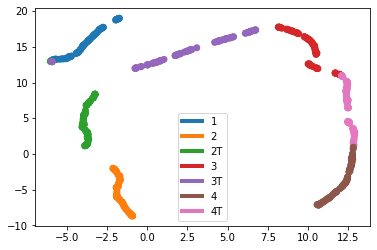

In [11]:
#UMAP of protein from simulator
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in data[data.columns[-1]].map({"1":0, "2":1, "2T":2,"3":3 ,"3T":4, "4":5, "4T":6 })])
custom_lines = [Line2D([0], [0], color=sns.color_palette()[x], lw=4) for x in range(7)]
                
sortedct = list(set(data[data.columns[-1]]))
sortedct.sort()
plt.legend(custom_lines, sortedct)

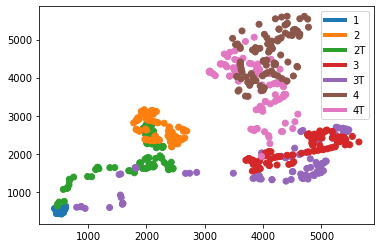

In [12]:
#scatter of 2 genes
plt.scatter(
    data[data.columns[1]],
     data[data.columns[2]],
    c=[sns.color_palette()[x] for x in data[data.columns[-1]].map({"1":0, "2":1, "2T":2,"3":3 ,"3T":4, "4":5, "4T":6 })])
custom_lines = [Line2D([0], [0], color=sns.color_palette()[x], lw=4) for x in range(7)]
                
sortedct = list(set(data[data.columns[-1]]))
sortedct.sort()
plt.legend(custom_lines, sortedct)

### CV-squared vs Mean

In [47]:
a = []
b= []
for i in range(1,5):
    a.append([])
    b.append([])
    a[i-1] = np.mean(data[data.columns[1:-1]][data[data.columns[-1]] == str(i)])
    b[i-1] = np.std(data[data.columns[1:-1]][data[data.columns[-1]] == str(i)])

In [79]:
x= []
models = []
for i in range(4):
    x.append([[samp] for samp in a[i]])
    models.append(LinearRegression())
    models[i].fit(x[i], np.divide(a[i],b[i])**2)
    

SpearmanrResult(correlation=0.4605617280706627, pvalue=1.4245482209910784e-06)
SpearmanrResult(correlation=0.23562026888875592, pvalue=0.018279474656492472)
SpearmanrResult(correlation=0.4361035353030121, pvalue=5.7494481042514625e-06)
SpearmanrResult(correlation=0.5212436881022203, pvalue=2.6950575259961748e-08)


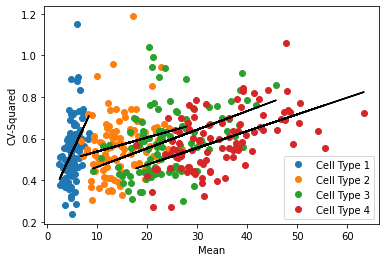

In [86]:
for i in range(4):
    plt.plot(a[i],np.divide(a[i],b[i])**2,'o')
    print(spearmanr(a[i],np.divide(a[i],b[i])**2))
   
for i in range(4):
    plt.plot(x[i],models[i].predict(x[i]),'k')

plt.xlabel('Mean')
plt.ylabel('CV-Squared')
plt.legend(['Cell Type 1', 'Cell Type 2', 'Cell Type 3', 'Cell Type 4'])